In [1]:
from prophet import Prophet
from datetime import datetime, timedelta
import pandas as pd
import functions

In [2]:
jpm_df = functions.plot_ticker("JPM", "adj_close", (datetime(2019, 11, 1), datetime(2024, 10, 31)), plot_figure=False)
data = jpm_df[["date", "adj_close"]]

data.set_index("date", inplace=True)
data.index = pd.to_datetime(data.index)
data.index.rename("ds", inplace=True)
data = data.rename(columns={"adj_close": "y"})

In [3]:
prophet_data = data.reset_index().rename(columns={'index': 'ds', 'adj_close': 'y'})

model = Prophet()
model.fit(prophet_data)

16:35:31 - cmdstanpy - INFO - Chain [1] start processing
16:35:32 - cmdstanpy - INFO - Chain [1] done processing


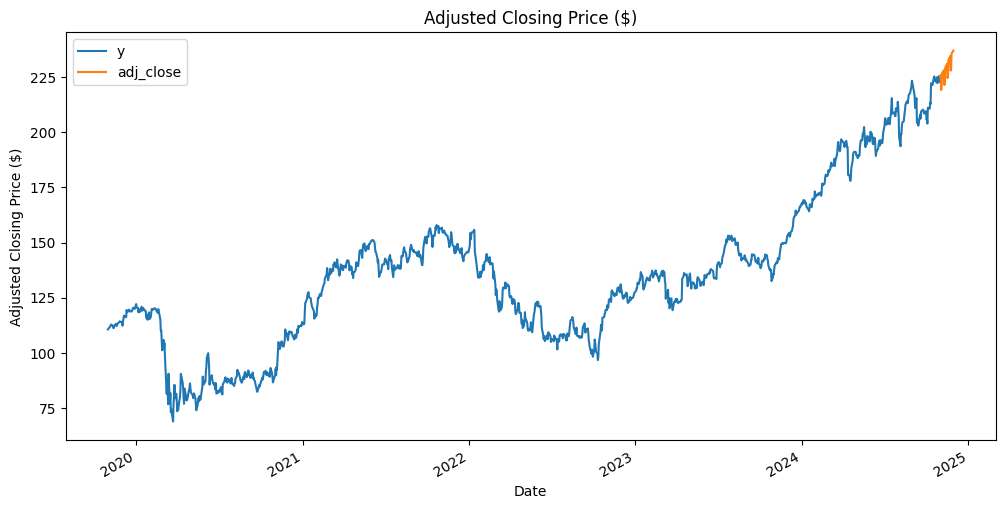

In [4]:
future = model.make_future_dataframe(periods=30)  # Create 60 future days for prediction
forecast = model.predict(future)

forecast = forecast[['ds', 'yhat']].set_index('ds')  # Select only the date and forecasted values
forecast = forecast.rename(columns={'yhat': 'adj_close'})  # Rename column to 'adj_close' to match original data

combined_data = pd.concat([data, forecast['adj_close'][data.index[-1] + timedelta(days=1):]])
functions.plot(combined_data, labels=('Date', 'Adjusted Closing Price ($)'))